In [1]:
from scipy import stats as st
from scipy.stats import sigmaclip
import pandas as pd
import seaborn as sns

In [2]:
dataframe = pd.read_csv('winemag-data_first150k.csv')

# Датасет ценообразования вина

In [3]:
dataframe.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


Изобразим график цены

In [4]:
print('~~~~~~~~~~~Row before dropping NAs: {}~~~~~~~~~~~'.format(len(dataframe)))
dataframe.dropna(subset=['price'], inplace=True)
print('~~~~~~~~~~~Row after dropping NAs: {}~~~~~~~~~~~'.format(len(dataframe)))

~~~~~~~~~~~Row before dropping NAs: 150930~~~~~~~~~~~
~~~~~~~~~~~Row after dropping NAs: 137235~~~~~~~~~~~


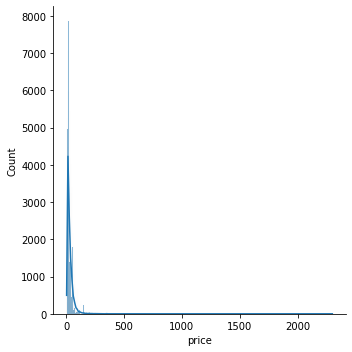

In [5]:
sns.displot(dataframe.price, kde=True)

Как видно распределение не очень близко к нормальному, поэтому используем sigmaclip для приведения к нормальной форме

In [6]:
dataframe.country.unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'US-France'], dtype=object)

In [7]:
dataframe.province.unique()

array(['California', 'Northern Spain', 'Oregon', 'Provence',
       'Northeastern Italy', 'Southwest France', 'Kumeu', 'Washington',
       'Bulgaria', 'France Other', 'Tuscany', 'Rhône Valley', 'Galicia',
       'Andalucia', 'Idaho', 'Burgundy', 'Loire Valley', 'New York',
       'Mendoza Province', 'Victoria', 'Alentejano', 'Alentejo',
       'Champagne', 'Piedmont', 'Upper Galilee', 'Beira Atlantico',
       'Veneto', 'Douro', 'Tejo', 'Stellenbosch', 'Sicily & Sardinia',
       'Southern Italy', 'Languedoc-Roussillon', 'Bordeaux',
       'Atalanti Valley', 'Catalonia', 'Santorini', 'Florina',
       'Marchigue', 'Colchagua Valley', 'Curicó Valley', 'Nemea',
       'Maule Valley', 'Alsace', 'Guerrouane', 'Colinele Dobrogei',
       'Central Spain', 'Vinho Verde', 'Mosel', 'Rheinhessen',
       'Golan Heights', 'Württemberg', 'Ahr', 'British Columbia',
       'Moldova', 'Spain Other', 'Sopron', 'Other', 'Walker Bay', 'Dão',
       'Duriense', 'Ontario', 'Beiras', 'Tokaji', 'Lisboa',
 

Анализ будет произведён по 2м критериям:
 - страна изготовления вина
 - провинция, где изготовлено вино

In [8]:
italy = pd.Series(sigmaclip(dataframe.price[(dataframe.country=='Italy')],3.0,3.0)[0]).iloc[:50]
italy

0     80.0
1     29.0
2     23.0
3     29.0
4     39.0
5     30.0
6     90.0
7     50.0
8     60.0
9     75.0
10    59.0
11    85.0
12    80.0
13    22.0
14    45.0
15    45.0
16    18.0
17    25.0
18    22.0
19    40.0
20    57.0
21    49.0
22    58.0
23    80.0
24    58.0
25    43.0
26    69.0
27    34.0
28    56.0
29    46.0
30    49.0
31    27.0
32    33.0
33    60.0
34    25.0
35    23.0
36    85.0
37    38.0
38    29.0
39    75.0
40    90.0
41    60.0
42    85.0
43    22.0
44    19.0
45    60.0
46    60.0
47    75.0
48    60.0
49    70.0
dtype: float64

In [9]:
US = pd.Series(sigmaclip(dataframe.price[(dataframe.country=='US')],3.0,3.0)[0]).iloc[:50]
US

0     65.0
1     65.0
2     60.0
3     48.0
4     48.0
5     75.0
6     24.0
7     60.0
8     45.0
9     62.0
10    60.0
11    60.0
12    37.0
13    42.0
14    55.0
15    60.0
16    40.0
17    18.0
18    69.0
19    25.0
20    30.0
21    36.0
22    50.0
23    60.0
24    45.0
25    19.0
26    54.0
27    38.0
28    28.0
29    42.0
30    22.0
31    65.0
32    50.0
33    10.0
34    13.0
35    18.0
36    36.0
37    24.0
38    50.0
39    48.0
40    20.0
41    17.0
42    12.0
43    10.0
44    13.0
45    45.0
46    25.0
47    59.0
48    49.0
49    42.0
dtype: float64

In [10]:
Spain = pd.Series(sigmaclip(dataframe.price[(dataframe.country=='Spain')],3.0,3.0)[0]).iloc[:50]
Spain

0     17.0
1     26.0
2     22.0
3     17.0
4     17.0
5     17.0
6     30.0
7     25.0
8     22.0
9     18.0
10    30.0
11    17.0
12    22.0
13    32.0
14    35.0
15    28.0
16    26.0
17    18.0
18    27.0
19    25.0
20    15.0
21    16.0
22    15.0
23    28.0
24    23.0
25    25.0
26    12.0
27    18.0
28    20.0
29    17.0
30    20.0
31    11.0
32    35.0
33    26.0
34    26.0
35    21.0
36    35.0
37    25.0
38    36.0
39    26.0
40    30.0
41    30.0
42    35.0
43    24.0
44    25.0
45    15.0
46    15.0
47    20.0
48    30.0
49    37.0
dtype: float64

In [11]:
Canada = pd.Series(sigmaclip(dataframe.price[(dataframe.country=='Canada')],3.0,3.0)[0]).iloc[:50]
Canada

0     70.0
1     17.0
2     24.0
3     19.0
4     38.0
5     30.0
6     32.0
7     60.0
8     40.0
9     18.0
10    40.0
11    40.0
12    15.0
13    24.0
14    30.0
15    18.0
16    18.0
17    25.0
18    32.0
19    40.0
20    30.0
21    20.0
22    21.0
23    18.0
24    40.0
25    30.0
26    21.0
27    25.0
28    25.0
29    32.0
30    23.0
31    30.0
32    33.0
33    28.0
34    22.0
35    45.0
36    30.0
37    45.0
38    18.0
39    45.0
40    20.0
41    24.0
42    15.0
43    20.0
44    15.0
45    25.0
46    12.0
47    13.0
48    15.0
49    25.0
dtype: float64

In [12]:
California = pd.Series(sigmaclip(dataframe.price[(dataframe.province=='California')],3.0,3.0)[0]).iloc[:50]
California

0     60.0
1     75.0
2     24.0
3     60.0
4     45.0
5     60.0
6     37.0
7     60.0
8     18.0
9     36.0
10    60.0
11    45.0
12    38.0
13    28.0
14    22.0
15    65.0
16    50.0
17    10.0
18    13.0
19    18.0
20    36.0
21    24.0
22    50.0
23    48.0
24    20.0
25    12.0
26    10.0
27    13.0
28    45.0
29    59.0
30    49.0
31    42.0
32    32.0
33    20.0
34    50.0
35    45.0
36    26.0
37    16.0
38    30.0
39    42.0
40    38.0
41    48.0
42    28.0
43    25.0
44    24.0
45    55.0
46    36.0
47    40.0
48    28.0
49    42.0
dtype: float64

In [13]:
Provence = pd.Series(sigmaclip(dataframe.price[(dataframe.province=='Provence')],3.0,3.0)[0]).iloc[:50]
Provence

0     20.0
1     36.0
2     34.0
3     30.0
4     40.0
5     20.0
6     26.0
7     17.0
8     34.0
9     38.0
10    35.0
11    38.0
12    38.0
13    32.0
14    40.0
15    24.0
16    25.0
17    24.0
18    20.0
19    17.0
20    20.0
21    35.0
22    22.0
23    27.0
24    20.0
25    24.0
26    35.0
27    40.0
28    20.0
29    19.0
30    24.0
31    20.0
32    21.0
33    23.0
34    29.0
35    25.0
36    40.0
37    15.0
38    20.0
39    22.0
40    20.0
41    22.0
42    12.0
43    17.0
44    20.0
45    26.0
46    21.0
47    24.0
48    23.0
49    15.0
dtype: float64

In [14]:
Oregon = pd.Series(sigmaclip(dataframe.price[(dataframe.province=='Oregon')],3.0,3.0)[0]).iloc[:50]
Oregon

0     65.0
1     65.0
2     48.0
3     48.0
4     62.0
5     50.0
6     19.0
7     54.0
8     42.0
9     26.0
10    50.0
11    24.0
12    35.0
13    36.0
14    36.0
15    60.0
16    15.0
17    60.0
18    16.0
19    70.0
20    48.0
21    49.0
22    63.0
23    30.0
24    48.0
25    50.0
26    42.0
27    29.0
28    19.0
29    15.0
30    45.0
31    18.0
32    35.0
33    46.0
34    50.0
35    35.0
36    44.0
37    18.0
38    48.0
39    49.0
40    48.0
41    20.0
42    26.0
43    18.0
44    32.0
45    57.0
46    24.0
47    48.0
48    65.0
49    45.0
dtype: float64

In [15]:
Tuscany = pd.Series(sigmaclip(dataframe.price[(dataframe.province=='Tuscany')],3.0,3.0)[0]).iloc[:50]
Tuscany

0      29.0
1      23.0
2      29.0
3      39.0
4      30.0
5      90.0
6      50.0
7     100.0
8      60.0
9      45.0
10     25.0
11     22.0
12     40.0
13     57.0
14     60.0
15     60.0
16     75.0
17     95.0
18     60.0
19     70.0
20     90.0
21     30.0
22     32.0
23     35.0
24     75.0
25     98.0
26     28.0
27     17.0
28     52.0
29     58.0
30     60.0
31     43.0
32     55.0
33     30.0
34     45.0
35     30.0
36     62.0
37     80.0
38     60.0
39     25.0
40     23.0
41     28.0
42     45.0
43    110.0
44     90.0
45     50.0
46     87.0
47     20.0
48     56.0
49     25.0
dtype: float64

In [16]:
df = pd.DataFrame(data = {'col1': italy.values, 'col2':US.values, 'col3':Spain.values, 'col4':Canada.values})
df1 = pd.DataFrame(data = {'col1': California.values, 'col2':Provence.values, 'col3':Oregon.values, 'col4':Tuscany.values})

Проверим выборки на независимость с помощью критерия $\chi^2$ Пирсона.

In [17]:
_, p, _, _  = st.chi2_contingency(df.T, correction=False)
print('p-value:', p)

alpha = 0.05
if p >= alpha:
    print(f'Нулевая гипотеза принимается')
else:
    print(f'Нулевая гипотеза отвергается')

p-value: 8.058741002599736e-95
Нулевая гипотеза отвергается


Проверка на нормальность выборок по провинциям

In [18]:
for i in range(4):
    col = 'col' + str(i + 1)
    _, p = st.shapiro(df1[col])
    print(p)
    alpha = 0.01
    if p >= alpha:
        print(f'Нулевая гипотеза принимается')
    else:
        print(f'Нулевая гипотеза отвергается')

0.22297313809394836
Нулевая гипотеза принимается
0.001089521567337215
Нулевая гипотеза отвергается
0.020061969757080078
Нулевая гипотеза принимается
0.005272279493510723
Нулевая гипотеза отвергается


Проверка на нормальность выборок по стране изготовления

In [19]:
for i in range(4):
    col = 'col' + str(i + 1)
    _, p = st.shapiro(df[col])
    print(p)
    alpha = 0.01
    if p >= alpha:
        print(f'Нулевая гипотеза принимается')
    else:
        print(f'Нулевая гипотеза отвергается')

0.012912820093333721
Нулевая гипотеза принимается
0.031763605773448944
Нулевая гипотеза принимается
0.10383708775043488
Нулевая гипотеза принимается
0.00027018331456929445
Нулевая гипотеза отвергается


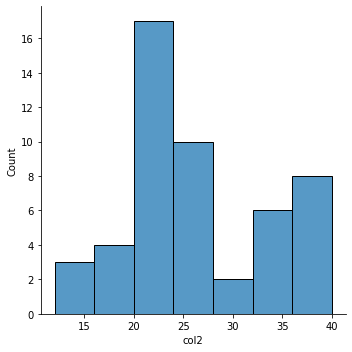

In [20]:
sns.displot(df1.col2)

Построим график коробка с усами для датасета по параметрам цена/количество комнат

<AxesSubplot:xlabel='country', ylabel='price'>

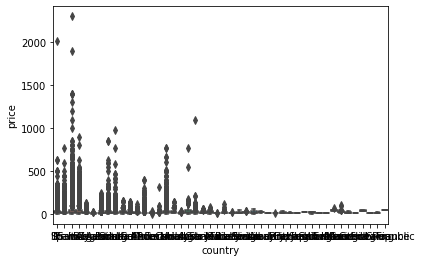

In [21]:
sns.boxplot(x="country", y="price", data=dataframe)

Построим график коробка с усами для датасета по параметрам цена/провинция

<AxesSubplot:>

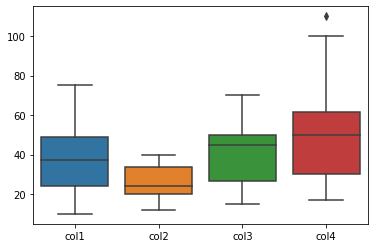

In [22]:
sns.boxplot(data=df1)

Проверка гипотезы о групповом равенстве дисперсий с помощью критерия левена для выборок цена/страна

In [23]:
_, p = st.levene(df['col1'], df['col2'], df['col3'], df['col4'])
print(f'p-value: {p:.4f}')

alpha = 0.05
if p >= alpha:
    print(f'Нулевая гипотеза принимается')
else:
    print(f'Нулевая гипотеза отвергается')

p-value: 0.0000
Нулевая гипотеза отвергается


Проведём однофакторный дисперсионный анализ на равенство мат ожиданий выборок цена/страна

In [24]:
_, p = st.f_oneway(df['col1'], df['col2'], df['col3'], df['col4'])
print(f'p-value: {p:.4f}')

alpha = 0.05

if p >= alpha:
    print(f'Нулевая гипотеза принимается')
else:
    print(f'Нулевая гипотеза отвергается')

p-value: 0.0000
Нулевая гипотеза отвергается


Выясним как группы различаются между собой

Воспользуемся критерием Тьюки

In [25]:
stacked_data1 = df1.stack().reset_index()
stacked_data1 = stacked_data1.rename(columns={'level_0': 'id',
                                            'level_1': 'group',
                                            0:'result'})
stacked_data1

,id,group,result
0,0,col1,60.0
1,0,col2,20.0
2,0,col3,65.0
3,0,col4,29.0
4,1,col1,75.0
...,...,...,...
195,48,col4,56.0
196,49,col1,42.0
197,49,col2,15.0
198,49,col3,45.0


In [26]:
stacked_data = df.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id',
                                            'level_1': 'group',
                                            0:'result'})
stacked_data

,id,group,result
0,0,col1,80.0
1,0,col2,65.0
2,0,col3,17.0
3,0,col4,70.0
4,1,col1,29.0
...,...,...,...
195,48,col4,15.0
196,49,col1,70.0
197,49,col2,42.0
198,49,col3,37.0


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  col1   col2    -9.86 0.0109 -18.0311  -1.6889   True
  col1   col3   -27.18  0.001 -35.3511 -19.0089   True
  col1   col4   -22.92  0.001 -31.0911 -14.7489   True
  col2   col3   -17.32  0.001 -25.4911  -9.1489   True
  col2   col4   -13.06  0.001 -21.2311  -4.8889   True
  col3   col4     4.26  0.528  -3.9111  12.4311  False
------------------------------------------------------
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  col1   col2   -11.36 0.0065 -20.3152 -2.4048   True
  col1   col3     3.76 0.6752  -5.1952 12.7152  False
  col1   col4    14.82  0.001   5.8648 23.7752   True
  col2   col3    15.12  0.001   6.1648 24.0752   True
  col2   col4    26.18  0.001  17.2248 35.1352   True
  col3   col4    1

c:\users\4702306\appdata\local\programs\python\python38\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


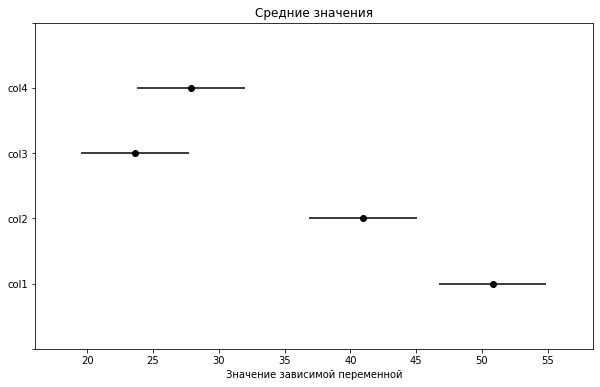

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
# Создадим экземпляр класса MultiComparison и передадим параметры из stacked_data
MultiComp = MultiComparison(stacked_data['result'], stacked_data['group'])
# вычислим значение критерия Тьюки с уровнем значимости 0.05
alpha = 0.05
results = MultiComp.tukeyhsd(alpha)

# результат
print(results.summary())
# визуализируем
fig = results.plot_simultaneous(xlabel='Значение зависимой переменной')
fig.get_axes()[0].title.set_text('Средние значения')

MultiComp1 = MultiComparison(stacked_data1['result'], stacked_data1['group'])
# вычислим значение критерия Тьюки с уровнем значимости 0.05
alpha = 0.05
results = MultiComp1.tukeyhsd(alpha)

# результат
print(results.summary())


Проведём двуфакторный дисперсионный анализ по факторам: провинция | страна

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('price ~ C(country) + C(province) + C(country):C(province)', data=dataframe.iloc[:100]).fit()
sm.stats.anova_lm(model, typ=2)

c:\users\4702306\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\users\4702306\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 3
  warnings.warn('covariance of constraints does not have full '
c:\users\4702306\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 243, but rank is 26
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(country),0.000141,9.0,4.930263e-09,0.999944
C(province),0.000021,27.0,2.392451e-10,1.000000
C(country):C(province),544753.524708,243.0,7.042090e-01,0.840411
Residual,229205.325332,72.0,NaN,NaN


# Как видно, признак 1 влияет сильно, признак 2 влияет сильно, но, вместе, они не оказывают сильного влияния на целевую